# Case Study : Bike Sharing Case Study

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands



## Step 1 : Understanding the Data

Importing the required libraries for Bike Sharing Case Study

In [1]:
import warnings #Libraray used to ignore warnings due to version problems
warnings.filterwarnings('ignore')

import numpy as np #Libraray used for numerical python
import pandas as pd #Libraray used for dataframe
import matplotlib.pyplot as plt #Libraray used for plotting
import seaborn as sns #Libraray used for data visualization

import sklearn #Libraray used for classification, predictive analytics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm #Libraray used for explore data, estimate statistical models, & perform statistical tests
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#reading the bike data
bike_data = pd.read_csv("/Users/amitkumar/Desktop/bikesharing/day.csv")

In [3]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Checking the bike data shape
bike_data.shape

(730, 16)

In [5]:
#instant has only index for the rows, hence dropped instant column & dteday is combination of date,
#month and year, in the provided dataset we do have seperate column, hence dropping dteday column.
bike_data = bike_data.drop(['instant','dteday'], axis=1)

In [6]:
#Min, Mean and Max of numberic variables
bike_data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#Check the null values in all the columns of bike data
bike_data.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# As recommended trasforming the season, month, weekday, weather columns to string values (for better readibility)

bike_data.season = bike_data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_data.mnth = bike_data.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike_data.weekday = bike_data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike_data.weathersit = bike_data.weathersit.map({1:'Clear',2:'Mist',3:'Light_snow_rain',4:'Heavy_snow_rain'})

In [9]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
#Checking missing values in bike data set
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


Looks like there are no missing values in the bike data set

In [11]:
# Describe the bike data set
bike_data.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2 : Visualizing the Relationship Among Variables Present in Bike Data

- Multicollinearity
- Categorical Variables

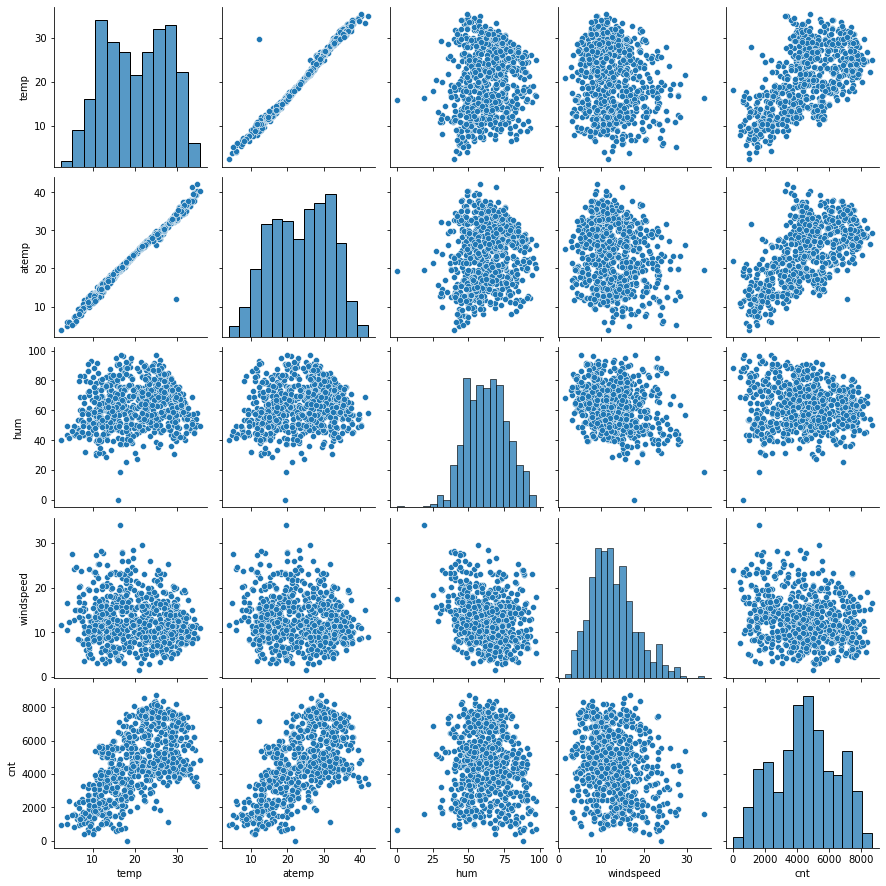

In [12]:
#Visualize the data to check multicollinearity
sns.pairplot(data=bike_data, vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

#### Observations from Multicollinearity  Check:
- It looks like temp and atemp has the highest corelation with the target variable cnt
- I have found that temp and atemp are also highly co-related with each other

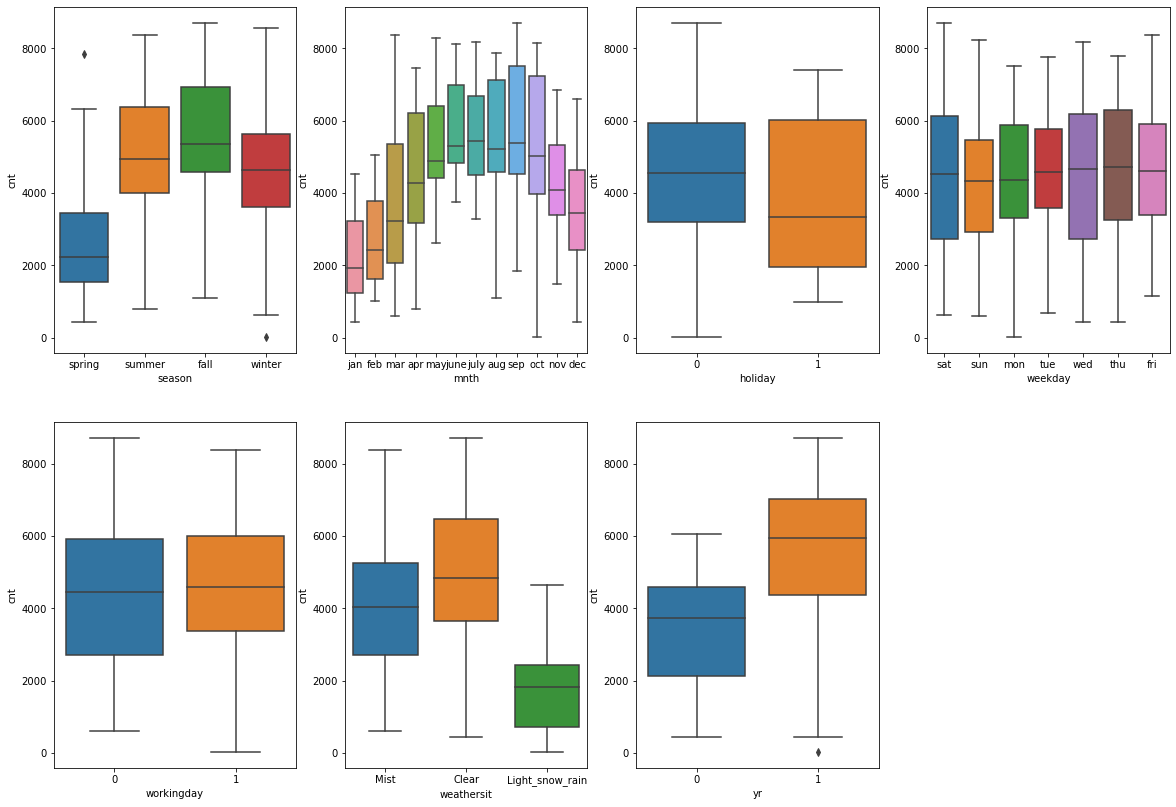

In [13]:
#Visualizing the data using boxplots for categorical variables
plt.figure(figsize=(20, 14))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.show()

#### Observations from Categorical Variables  Check:
- In the cnt vs season boxplot, there is a hike in demand in summer and fall season
- In year 2019 we have found that, there is a hike in demand of bikes
- In the cnt vs yr boxplot, we can notice that there is increase in demand from May month, which is supposed to be a holidays for childrens and teenagers
- The week day is not showing and inconsistency over the week
- We can notice that drop in demand in the snow weather in cnt vs weather situation boxplot

In [14]:
# function for categorical columns:
def categorical_columns(columns):
    plt.figure(figsize = (12,8))
    plt.subplot(1,2,1)
    sns.barplot(columns,'cnt',data=bike_data)
    plt.subplot(1,2,2)
    sns.barplot(columns,'cnt',data=bike_data, hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

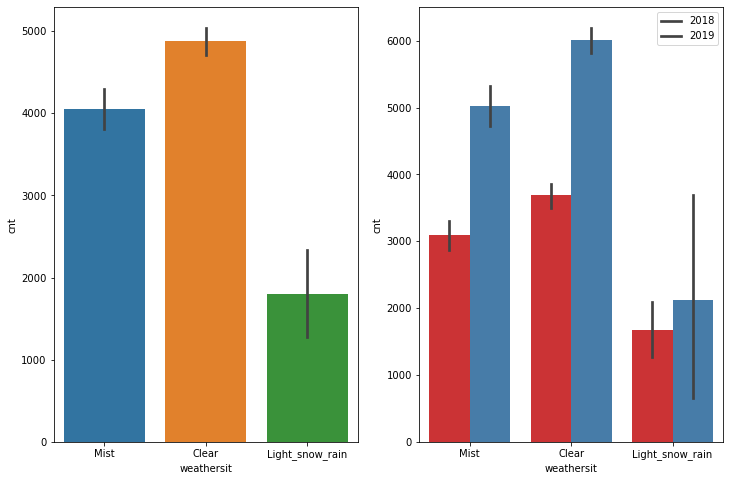

In [15]:
# plotting for weathersit column
categorical_columns('weathersit')

More bookings happened, when weathersit is clear. In year 2019 bookings are more than in compare of year 2018

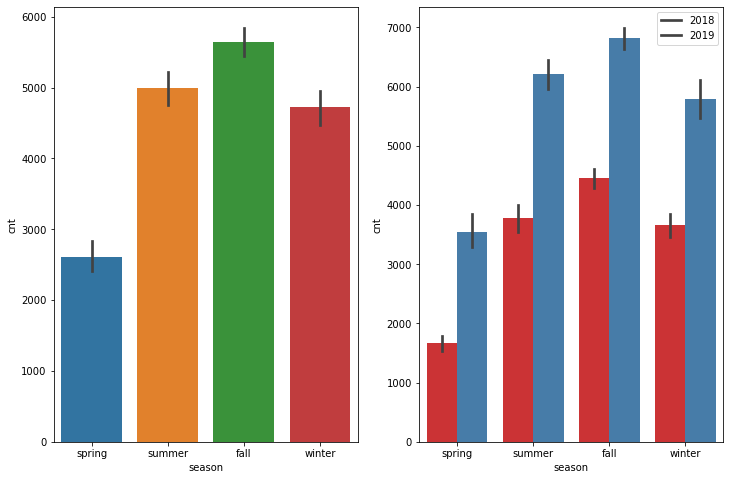

In [16]:
#plotting for season column
categorical_columns('season')

- There were more bookings found in fall season followed by summer, winter and spring
- It looks like more bookings in year 2019, which is more than in compare of year 2018  

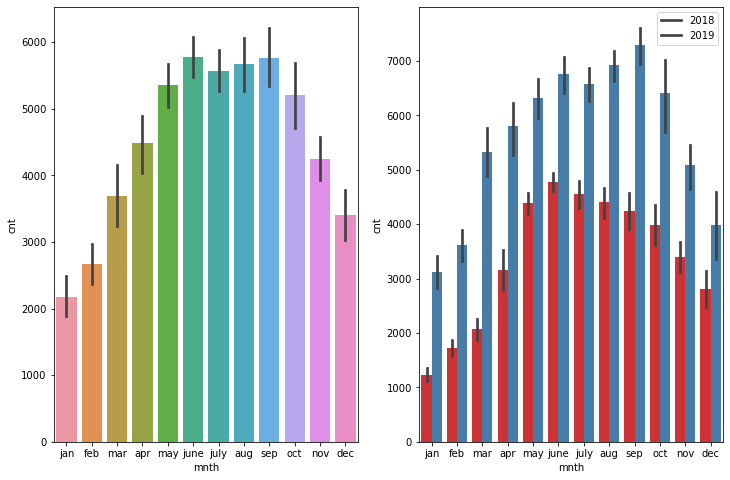

In [17]:
#plotting for season column
categorical_columns('mnth')

There is more bookings happened in fall and summer months, May through September (excludingm month of July) and it started decreasing at the end of the year

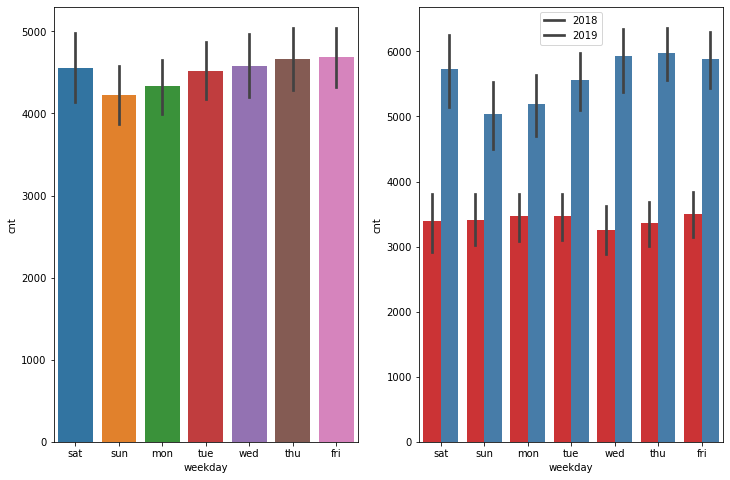

In [18]:
#plotting for weekday column
categorical_columns('weekday')

There is no sales difference between week day or weekend

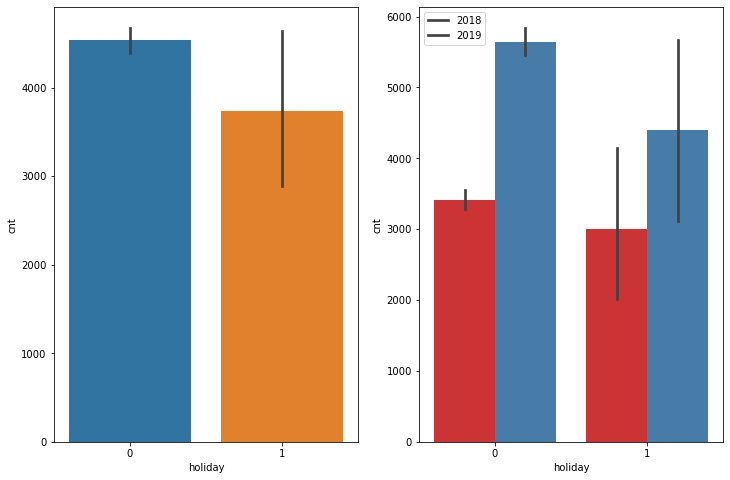

In [19]:
# plotting for holiday column
categorical_columns('holiday')

There is no any big change between working day and hoilday

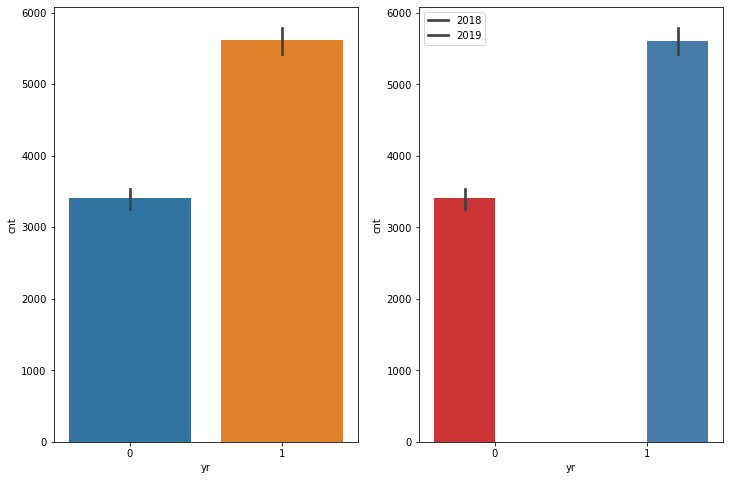

In [20]:
# plotting for year column
categorical_columns('yr')

By looking into years data we found that there is more bookings happended in year 2019 coarision to year 2018

In [21]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


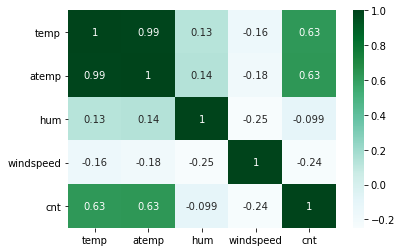

In [22]:
# Checking continuous variables relationship with each other
sns.heatmap(bike_data[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

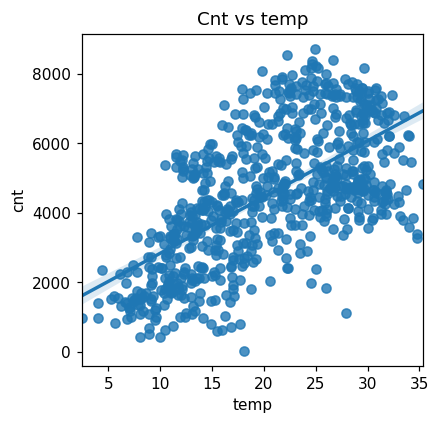

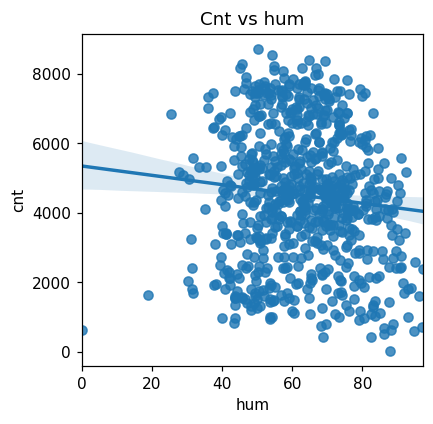

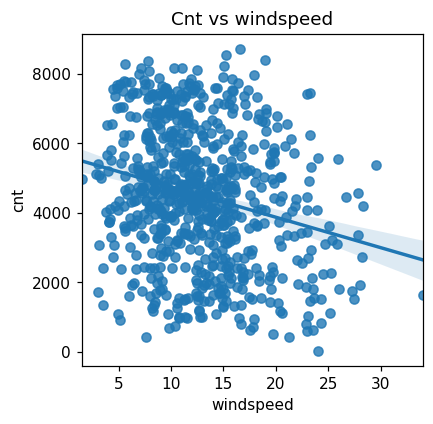

In [23]:
# Numeric Data Visualisation distplot
a_df = ['temp','hum','windspeed']
for i in a_df:
    plt.figure(figsize=(4,4),dpi=110)
    plt.title(('Cnt vs '+ i),fontsize=12)
    sns.regplot(data=bike_data,y="cnt",x=i)
    plt.xlabel(i)
    plt.show()

#### Observation from Numeric Data Visualisation :
- We can say that cnt is linearly increasing with temp, which indicates indicates linear relation
- Wec can also say that demand for bikes is positively correlated to temp
- Hum is values are more scattered around
- cnt decreasing when, there is a increase in humidity
- Windspeed's values are more scattered around
- Cnt is decrease, when increase in windspeed

### Step 3 : Data Preparation

Creating dummy variables for categorical columns

In [24]:
# creating dummy vars for season, month, weekday, workday, weather
bike_data_season = pd.get_dummies(bike_data['season'], drop_first = True)
bike_data_month = pd.get_dummies(bike_data['mnth'], drop_first = True)
bike_data_weekday = pd.get_dummies(bike_data['weekday'], drop_first = True)
bike_data_weather = pd.get_dummies(bike_data['weathersit'], drop_first = True)

In [25]:
# Adding back the results to the original bike sharing dataframe
bike_data = pd.concat([bike_data,bike_data_season,bike_data_weather,bike_data_month,bike_data_weekday], axis = 1)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,0,0,0
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [26]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           730 non-null    object 
 1   yr               730 non-null    int64  
 2   mnth             730 non-null    object 
 3   holiday          730 non-null    int64  
 4   weekday          730 non-null    object 
 5   workingday       730 non-null    int64  
 6   weathersit       730 non-null    object 
 7   temp             730 non-null    float64
 8   atemp            730 non-null    float64
 9   hum              730 non-null    float64
 10  windspeed        730 non-null    float64
 11  casual           730 non-null    int64  
 12  registered       730 non-null    int64  
 13  cnt              730 non-null    int64  
 14  spring           730 non-null    uint8  
 15  summer           730 non-null    uint8  
 16  winter           730 non-null    uint8  
 17  Light_snow_rain 

In [27]:
# Dropping all columns whose dummy variable we have already created
bike_data.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,1


In [28]:
# casual and registered varibale are looks kike the breakup by category for cnt column.
bike_data.drop(['casual','registered'],axis=1,inplace=True)
bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   spring           730 non-null    uint8  
 9   summer           730 non-null    uint8  
 10  winter           730 non-null    uint8  
 11  Light_snow_rain  730 non-null    uint8  
 12  Mist             730 non-null    uint8  
 13  aug              730 non-null    uint8  
 14  dec              730 non-null    uint8  
 15  feb              730 non-null    uint8  
 16  jan              730 non-null    uint8  
 17  july            

### Step 4 : Splitting the Data into Training and Testing Sets

In [30]:
# We are here specifying that the training and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
df_train.shape

(510, 30)

In [32]:
df_test.shape

(219, 30)

In [33]:
scaler = MinMaxScaler()

#### Rescaling the Features
We are here using MinMax scaling

In [34]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,1,0,0,0,0


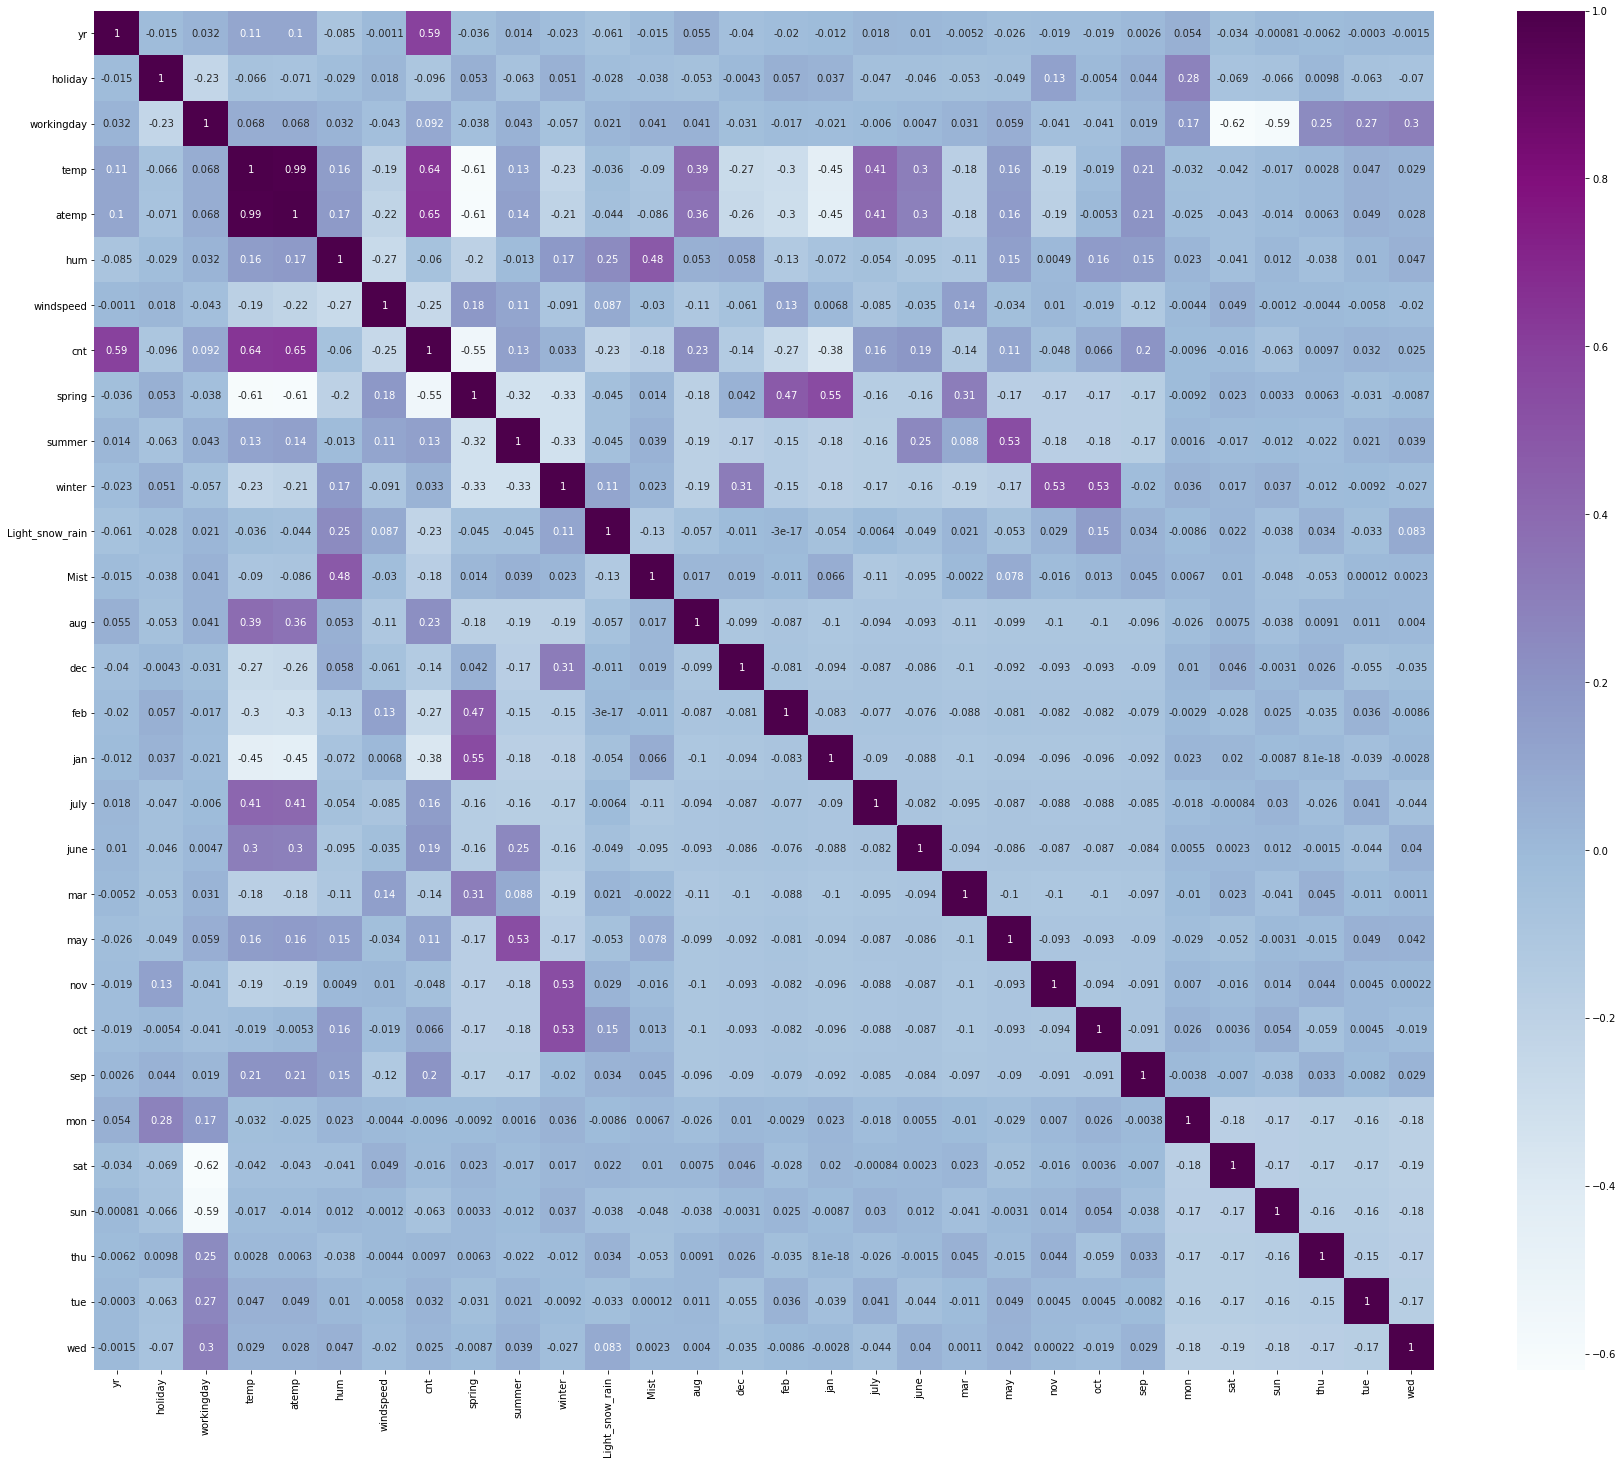

In [35]:
# Correlation coefficients to check, which variables are highly correlated
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="BuPu")
plt.show()

##### Observation from above Heatmap :
- It looks like cnt has correlation with year(0.64) and temp(0.59)
- Spring with Jan (0.55) and Feb(0.47) months show correlation
- Winter with Nov (0.53) and Oct(0.53) months show correleation

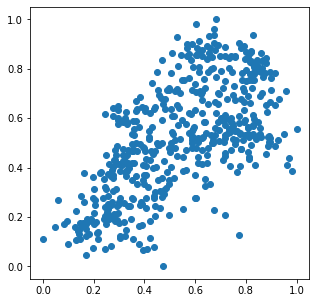

In [36]:
# Correlation with scatter plot btw temp and cnt
plt.figure(figsize=[5,5])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [37]:
y_train = df_train.pop('cnt')
X_train = df_train

X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               510 non-null    int64  
 1   holiday          510 non-null    int64  
 2   workingday       510 non-null    int64  
 3   temp             510 non-null    float64
 4   atemp            510 non-null    float64
 5   hum              510 non-null    float64
 6   windspeed        510 non-null    float64
 7   spring           510 non-null    uint8  
 8   summer           510 non-null    uint8  
 9   winter           510 non-null    uint8  
 10  Light_snow_rain  510 non-null    uint8  
 11  Mist             510 non-null    uint8  
 12  aug              510 non-null    uint8  
 13  dec              510 non-null    uint8  
 14  feb              510 non-null    uint8  
 15  jan              510 non-null    uint8  
 16  july             510 non-null    uint8  
 17  june           

### Step 4 : Start Building Model
Dividing into X and Y sets for the model building

In [39]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=15) # running RFE
rfe = rfe.fit(X_train, y_train)

In [40]:
# selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 2),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Light_snow_rain', True, 1),
 ('Mist', True, 1),
 ('aug', False, 2),
 ('dec', False, 2),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', False, 2),
 ('june', False, 2),
 ('mar', False, 2),
 ('may', False, 2),
 ('nov', False, 2),
 ('oct', False, 2),
 ('sep', True, 1),
 ('mon', False, 2),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 2),
 ('tue', False, 2),
 ('wed', False, 2)]

In [41]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'winter', 'Light_snow_rain', 'Mist', 'jan', 'sep', 'sat', 'sun'],
      dtype='object')

In [42]:
X_train.columns[~rfe.support_]

Index(['spring', 'summer', 'aug', 'dec', 'feb', 'july', 'june', 'mar', 'may',
       'nov', 'oct', 'mon', 'thu', 'tue', 'wed'],
      dtype='object')

#### Building Model

In [43]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [44]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [45]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model


In [46]:
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.39e-178
Time:                        15:46:55   Log-Likelihood:                 483.39
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     496   BIC:                            -879.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1811      0.024     

In [47]:
# dropping atemp 
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

Rebuild the Model without atemp variable

In [48]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [49]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [50]:
# Let's see the summary of our linear model after dropping the atemp variable
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     195.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.20e-179
Time:                        15:46:55   Log-Likelihood:                 483.11
No. Observations:                 510   AIC:                            -940.2
Df Residuals:                     497   BIC:                            -885.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1823      0.024     

After dropping the atemp feature, didn't see increase in R-square. It is as same as earlier 0.825

In [51]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'winter', 'Light_snow_rain', 'Mist', 'jan', 'sep', 'sat',
       'sun'],
      dtype='object')

In [52]:
# Dropping the constant variable
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [53]:
# Calculate the VIFs for the New Model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,atemp,51.66
3,temp,51.39
2,workingday,33.86
12,sat,8.36
13,sun,8.16
1,holiday,2.23
5,hum,1.88
9,Mist,1.56
10,jan,1.44
7,winter,1.30


In [54]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()

In [55]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.39e-178
Time:                        15:46:55   Log-Likelihood:                 483.39
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     496   BIC:                            -879.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1811      0.024     

In [56]:
# Dropping the humidity
X_train_new = X_train_new.drop(['hum'], axis=1)

In [57]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,atemp,51.40
3,temp,51.36
2,workingday,15.74
11,sat,4.39
12,sun,4.07
1,holiday,1.53
9,jan,1.44
6,winter,1.26
5,windspeed,1.14
10,sep,1.07


In [58]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_1 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     190.1
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          5.57e-177
Time:                        15:46:55   Log-Likelihood:                 477.41
No. Observations:                 510   AIC:                            -928.8
Df Residuals:                     497   BIC:                            -873.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1209      0.017     

In [59]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     190.1
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          5.57e-177
Time:                        15:46:55   Log-Likelihood:                 477.41
No. Observations:                 510   AIC:                            -928.8
Df Residuals:                     497   BIC:                            -873.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1209      0.017     

In [60]:
# Dropping jan, since it has next high p-value and see if it makes difference in R-squareed
X_train_new = X_train_new.drop(['jan'], axis=1)

In [61]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,51.28
4,atemp,51.26
2,workingday,11.86
10,sat,3.47
11,sun,3.25
1,holiday,1.36
5,windspeed,1.12
6,winter,1.12
9,sep,1.07
7,Light_snow_rain,1.06


In [62]:
# Building 4th linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     198.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          5.85e-174
Time:                        15:46:55   Log-Likelihood:                 467.49
No. Observations:                 510   AIC:                            -911.0
Df Residuals:                     498   BIC:                            -860.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0840      0.015     

In [63]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,51.28
4,atemp,51.26
2,workingday,11.86
10,sat,3.47
11,sun,3.25
1,holiday,1.36
5,windspeed,1.12
6,winter,1.12
9,sep,1.07
7,Light_snow_rain,1.06


##### Final Observation from Model Building
We can now finalise that all variables have low VIF and low P value

In [64]:
# Look into parameters and their coefficient values
lr_3.params

const              0.084018
yr                 0.232652
holiday           -0.053152
workingday         0.058831
temp               0.469247
atemp              0.104882
windspeed         -0.131890
winter             0.105565
Light_snow_rain   -0.288392
Mist              -0.076680
sep                0.073293
sat                0.068328
sun                0.010012
dtype: float64

In [65]:
X_train_lm_3

,const,yr,holiday,workingday,temp,atemp,windspeed,winter,Light_snow_rain,Mist,sep,sat,sun
653,1.0,1,0,1,0.509887,0.501133,0.300794,1,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.766351,0.264686,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.438975,0.255342,0,0,1,0,1,0
728,1.0,1,0,0,0.245101,0.200348,0.663106,0,0,0,0,0,1
482,1.0,1,0,0,0.395666,0.391735,0.188475,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,1,0.824514,0.762183,0.355596,0,0,1,0,0,0
578,1.0,1,0,1,0.863973,0.824359,0.187140,0,0,0,0,0,0
53,1.0,0,0,1,0.202618,0.218747,0.111379,0,0,0,0,0,0
350,1.0,0,0,0,0.248216,0.223544,0.431816,1,0,1,0,1,0


#### Residual analysis
If the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like below:

In [66]:
y_train_pred = lr_3.predict(X_train_lm_3)

Text(0.5, 0, 'Errors')

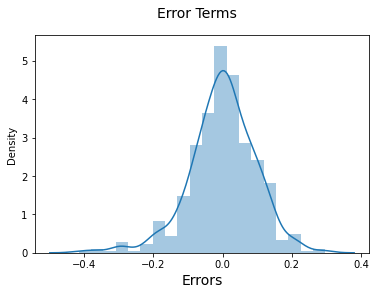

In [67]:
# Plotting a Histogram for dispalying the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 14) 
plt.xlabel('Errors', fontsize = 14)

Error terms of the training data look normal since it is centered around zero

Text(0, 0.5, 'Residual')

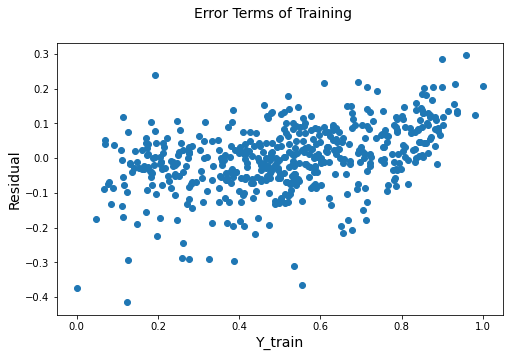

In [68]:
# Error terms
res_train = y_train - y_train_pred
c = [i for i in range(1,len(y_train)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_train,res_train)
fig.suptitle('Error Terms of Training', fontsize=14)# Plot heading 
plt.xlabel('Y_train', fontsize=14) # X-label
plt.ylabel('Residual', fontsize=14)

#### Observation:

- It seems like the corresponding residual plot is reasonably random
- We can not detect any visible patterns
- Also the error terms satisfies to have reasonably constant variance (homoscedasticity)

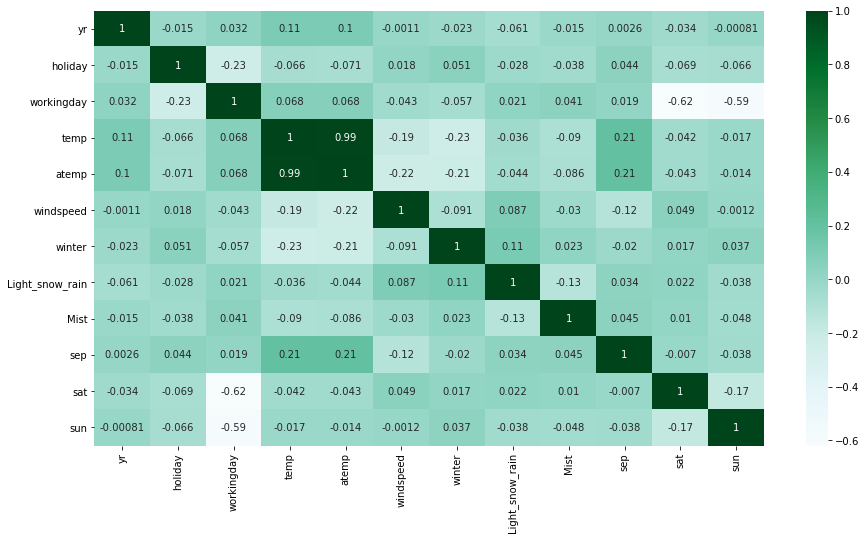

In [69]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="BuGn")
plt.show()

#### Predictions and Evaluation on the Test set

In [70]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [71]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,0,0,1,0,0


In [72]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
y_test = df_test.pop('cnt')
X_test = df_test

In [74]:
X_test = X_test[X_train_new.columns]

# Adding constant variable to test dataframe
X_test_lm_4 = sm.add_constant(X_test)

In [75]:
y_pred = lr_3.predict(X_test_lm_4)

#### Model Evaluation

Text(0, 0.5, 'y_pred')

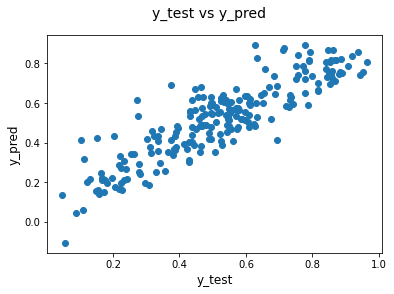

In [76]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=14) # Plot heading 
plt.xlabel('y_test', fontsize=12) # X-label
plt.ylabel('y_pred', fontsize=12) 

In [77]:
# Print R-squared Value
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7741

#### Residual Analysis on the test set

Text(0.5, 0, 'Errors')

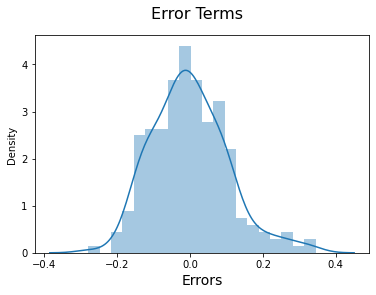

In [78]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_pred - y_test), bins = 20)
fig.suptitle('Error Terms', fontsize = 16)                  # Plot heading 
plt.xlabel('Errors', fontsize = 14) 

Error terms of prediction looks normal since it is centered around zero

Text(0, 0.5, 'Residual')

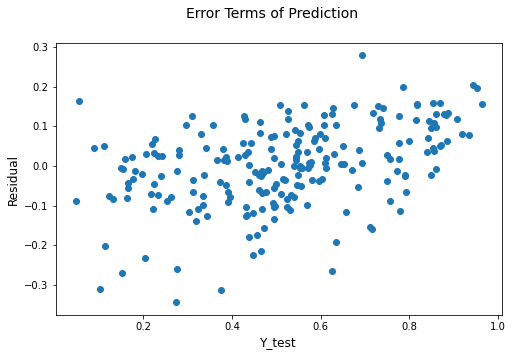

In [79]:
# Error terms
res_test = y_test - y_pred
c = [i for i in range(1,len(y_train)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_test,res_test)
fig.suptitle('Error Terms of Prediction', fontsize=14) # Plot heading 
plt.xlabel('Y_test', fontsize=12) # X-label
plt.ylabel('Residual', fontsize=12)  

#### Observation:

- It looks like the corresponding residual plot is reasonably random
- We can not detect any visible patterns
- Also the error terms satisfies to have reasonably constant variance (homoscedasticity)

### Summary

The company wanted to know which variables are significant in predicting the demand for shared bikes? How well those variables describe the bike demands
  
#### Observations from above Study:

- R sqaured of training and testing is almost identical
- The plot of y_test and y_pred shows a linear spread
- Error terms are normally distributed and centered around zero
- The variables selscted in the finalised model are temp, windspeed, 'yr', 'summer', 'moderate', 'winter', 'sep'and 'holiday' since they showed lowest VIF and P value
- Error terms are normally distributed and centered around zero even for the prediction set.
- We also observed that the residuals are randomly distributed for training as well as testing

#### After analysing the above model, the comapany should focus on the following features:
- Company should focus on expanding business during Spring and Winter, ideally during the month of November, December Jan, Feb, March, since it seems that around this period cnt was low.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- Also, since there low booking during Sping and winter which is when the wheater is between bad to severe, they could probably use this time to serive the bikes without incuring any drop in business.
- Furthermore, since it is an service that is tangible in nature and used by multiple consumers, by keeping in mind market trends, the company should incorporate sanitation of the bikes which will boost customer confidence in the service